# Introduction to Convolution Neural Network and Computer Vision with TensorFlow

Computer vision is practice of writing algorithum which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front

**What we’re going to cover**
* Getting a dataset to work with (pizza_steak )
* Architecture of a convolutional neural networ® (CNN) with TensorFlow
* An end-to-end binary image classification problem
* Steps in modelling with CNNs
	* Creating a CNN, compiling a model, fitting a model, evaluating a model
* An end-to-end multi-class image classification problem
* Making predictions on our own custom images

**Example**
* [tesla autopilot](https://www.tesla.com/autopilot)

## Get the data

The images we are working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we have modified it to only use two classes (pizza & steak) using the image data modification notebook:
https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> 🔑 **Note** We start with the smaller dataset so we can experiment  quickly and figure what works (or better yet what doesnot work) before scalling up

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-02-19 04:42:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.207, 172.217.194.207, 142.250.4.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.3MB/s    in 5.6s    

2024-02-19 04:42:23 (18.6 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very cricial step at the begining of any machine learning project is becoming one with the data

And for a computer vision project... this usually means visuallizing many  samples of your data

In [ ]:
!ls   pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak/

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
import os

# walk through pizza_steak directory and list number of files
for dirpath , dirnames , filename in os.walk("pizza_steak") :
  print (f"There are {len(dirnames)} directories and {len(filename)} images in '{dirpath}'")

There are 2 directories and 0 images in 'pizza_steak'
There are 2 directories and 0 images in 'pizza_steak/test'
There are 0 directories and 250 images in 'pizza_steak/test/steak'
There are 0 directories and 250 images in 'pizza_steak/test/pizza'
There are 2 directories and 0 images in 'pizza_steak/train'
There are 0 directories and 750 images in 'pizza_steak/train/steak'
There are 0 directories and 750 images in 'pizza_steak/train/pizza'


In [ ]:
!ls -la pizza_steak/

total 16
drwxr-xr-x 4 root root 4096 Feb 19 04:42 .
drwxr-xr-x 1 root root 4096 Feb 19 04:42 ..
drwxr-xr-x 4 root root 4096 Feb 19 04:42 test
drwxr-xr-x 4 root root 4096 Feb 19 04:42 train


In [ ]:
# Another way to how many images in a file
num_steak_images_train = len (os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To Visualize our images , first lests get the class names programmatically

In [ ]:
#  Get the class name programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # created a list of class_names from subdirectories
# class_names = class_names[1:] # remove /DS_store
print (class_names)

['pizza' 'steak']


In [ ]:
# Lets visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir , target_class):
  # Setup the target directory (we will view images from here)
  target_folder = target_dir + target_class

  # Get the random image path
  random_image = random.sample(os.listdir(target_folder),1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print (f"Image shape {img.shape}") # show the shape of image
  return img

Image shape (512, 512, 3)


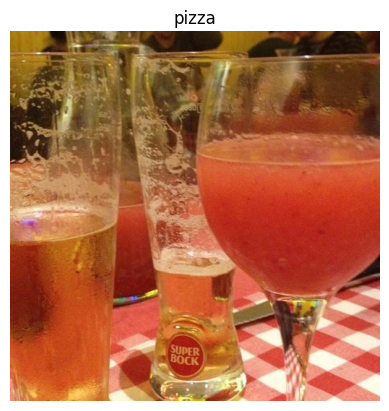

In [ ]:
# View a random image from pizza training dataset
img_pizza = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

Image shape (512, 512, 3)


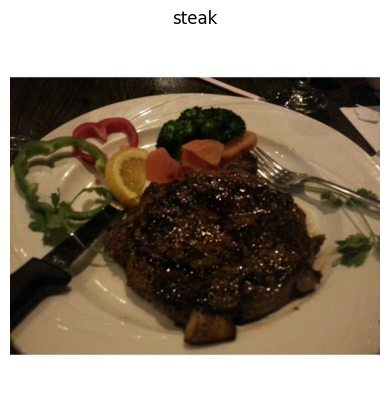

In [ ]:
# View a random image from steak training dataset
img_steak = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [ ]:
# The images we have imported and ploted are actually gaints arrays/ tensors of different pixel values
import tensorflow as tf
tf.constant (img_pizza)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[161, 125,  13],
        [165, 129,  17],
        [165, 128,  14],
        ...,
        [ 59,  21,  10],
        [ 59,  19,   9],
        [ 59,  19,   9]],

       [[159, 123,  11],
        [162, 126,  14],
        [165, 128,  14],
        ...,
        [ 58,  20,   9],
        [ 58,  20,   9],
        [ 58,  20,   9]],

       [[159, 121,  10],
        [160, 122,  11],
        [164, 126,  15],
        ...,
        [ 55,  18,   9],
        [ 55,  18,   9],
        [ 55,  18,   9]],

       ...,

       [[236, 143, 110],
        [238, 148, 114],
        [235, 145, 111],
        ...,
        [247, 152, 134],
        [247, 152, 134],
        [239, 144, 126]],

       [[243, 150, 117],
        [236, 146, 112],
        [240, 149, 118],
        ...,
        [231, 140, 122],
        [241, 150, 132],
        [246, 155, 137]],

       [[245, 152, 119],
        [230, 140, 106],
        [238, 147, 116],
        ...,
        [238, 149, 13

> 🔑: **Note:** As we have discussed before many machine learning models, including neural network prefer the values they work with to be between 0 and 1 . knowning this one of the most common preprocessing steps for working with images is **scale** (also referred to as **normalize**) their pixel values by dividing image array by 255 (since 255 is the maximum pixel value)

In [ ]:
#  View the image shape
img_pizza.shape # returns width , heights annd color channels

(512, 512, 3)

In [ ]:
# Get all the pixel values between 0 & 1
img_pizza/255.

array([[[0.63137255, 0.49019608, 0.05098039],
        [0.64705882, 0.50588235, 0.06666667],
        [0.64705882, 0.50196078, 0.05490196],
        ...,
        [0.23137255, 0.08235294, 0.03921569],
        [0.23137255, 0.0745098 , 0.03529412],
        [0.23137255, 0.0745098 , 0.03529412]],

       [[0.62352941, 0.48235294, 0.04313725],
        [0.63529412, 0.49411765, 0.05490196],
        [0.64705882, 0.50196078, 0.05490196],
        ...,
        [0.22745098, 0.07843137, 0.03529412],
        [0.22745098, 0.07843137, 0.03529412],
        [0.22745098, 0.07843137, 0.03529412]],

       [[0.62352941, 0.4745098 , 0.03921569],
        [0.62745098, 0.47843137, 0.04313725],
        [0.64313725, 0.49411765, 0.05882353],
        ...,
        [0.21568627, 0.07058824, 0.03529412],
        [0.21568627, 0.07058824, 0.03529412],
        [0.21568627, 0.07058824, 0.03529412]],

       ...,

       [[0.9254902 , 0.56078431, 0.43137255],
        [0.93333333, 0.58039216, 0.44705882],
        [0.92156863, 0

## An end-to-end example

Lets build a convolutional neural network to find patterens in our images, more specifically we need a way to:

* Load our images
* preprocess our images
* Buid a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data




In [ ]:
from warnings import filters
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of pixel values beteen 0 & 1 , also called scaling & mormalization)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen =  ImageDataGenerator(rescale = 1./255)

# Setup path to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)

#  Build a CNN Model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size =3,
                           activation = tf.keras.activations.relu,
                           input_shape = (224,224,3)),
     tf.keras.layers.Conv2D(10, 3, activation = tf.keras.activations.relu),
     tf.keras.layers.MaxPool2D(pool_size = 2,
                               padding = "valid"),
    tf.keras.layers.Conv2D(10,3, activation = tf.keras.activations.relu),
    tf.keras.layers.Conv2D(10,3, activation = tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)

])

# Compile our CNN
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 14s 174ms/step - loss: 0.6294 - accuracy: 0.6667 - val_loss: 0.4540 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 6s 123ms/step - loss: 0.4602 - accuracy: 0.7840 - val_loss: 0.3683 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 7s 147ms/step - loss: 0.4182 - accuracy: 0.8053 - val_loss: 0.3407 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 6s 125ms/step - loss: 0.3690 - accuracy: 0.8493 - val_loss: 0.3419 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 7s 147ms/step - loss: 0.3554 - accuracy: 0.8527 - val_loss: 0.3421 - val_accuracy: 0.8640


In [ ]:
batch_size = 1500/32
len(train_data) , batch_size

(47, 46.875)

> 🔑 **Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure you are using a GPU by going to Runtime -> Change Runtime type -> Hardware Accelerator -> GPU (you may have to rerun some cells above)

In [ ]:
#  get the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

**Practice/Exercise** Go through the CNN explainer website for a minimum of 10-minutes and compare our neural network with thiers:

https://poloclub.github.io/cnn-explainer/


## Using the same model as before

Lets replicate the model we have built in a previous section to see if it works with our image data.

The model we are building is from the TensorFlow playground

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create a model to replicate the tensorflow playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation = tf.keras.activations.sigmoid),
])

# Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])


# Fit the model
history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 140ms/step - loss: 0.6993 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 116ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 123ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 113ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 116ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
#  Get the model 2 summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* model 1 has 31101 parameters
* model 2 has 602141 parameters

> Despite having 20x more parameter than our CNN (model_1), model_2 perform teribily .. lets try to improve it



In [ ]:
# set random seed
tf.random.set_seed(42)

# Create a model (same as above but lets step it up  a motch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(100,activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(100,activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(100,activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation = tf.keras.activations.sigmoid),
])

# Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])


# Fit the model
history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 118ms/step - loss: 4.4018 - accuracy: 0.5827 - val_loss: 1.5456 - val_accuracy: 0.5420
Epoch 2/5
47/47 [==============================] - 7s 160ms/step - loss: 0.8595 - accuracy: 0.6880 - val_loss: 0.5974 - val_accuracy: 0.7120
Epoch 3/5
47/47 [==============================] - 6s 135ms/step - loss: 0.6034 - accuracy: 0.7380 - val_loss: 0.5264 - val_accuracy: 0.7560
Epoch 4/5
47/47 [==============================] - 6s 120ms/step - loss: 0.5729 - accuracy: 0.7460 - val_loss: 0.5000 - val_accuracy: 0.7640
Epoch 5/5
47/47 [==============================] - 5s 117ms/step - loss: 0.4754 - accuracy: 0.7933 - val_loss: 0.5047 - val_accuracy: 0.7320


In [ ]:
# Get the model 3 summary
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Number parameter model_3 differ from model_1
15073201 / 31101

484.6532587376612

🔑**Note:** You can think of trainable parameters as **patterns a model can learn from data**. Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Wehere a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in dechiphering between different **features** in an image.

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Binary Classcification : lets break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameter (try to beat the baseline)
7. Repeat untill satisfied (experiment , experiment, experiment)

### 1.Become one with the data

Image shape (512, 512, 3)
Image shape (512, 512, 3)


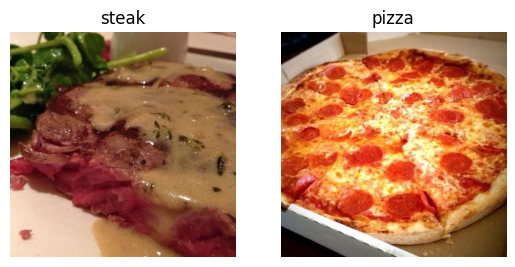

In [ ]:
# Visulaize the data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2.Preprocess the data (prepare it for a model)

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**

A batch is a small subset of data. Rather than look at all ~10k images at one time , a model only look at 32 at a time.

It does this for a couple of reason:
1. 10k images (or more) might not fit into memory of processor (GPU)
2. Trying to learn the patterns in 10k images in one hit could result in the model not being able to learn very well.

why 32?
Because 32 is good for health will result in less test error :)


In [ ]:
!nvidia-smi

Mon Feb 19 04:44:39 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0              29W /  70W |   1665MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Create a train and test data generator and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir, #  target directory of images
                                               target_size = (224,224), # target size of image (height , width)
                                               class_mode = "binary", # type of data you are working with
                                               batch_size = 32)  # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#  Get a sample of a train data batch
images , labels =train_data.next() # get the "next" batch of images/labels in train_data
len(images) , len(labels)

(32, 32)

In [ ]:
# How many batch are there?
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
#  Get the fist two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
#  View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

###  3.Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that setup when begning a machine learning experiment and then as you keep experimenting . you try to beet the baseline

> 🔑**Note** In deep learning , there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem)

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this will be the out baseline, a layer convolutional neural network )
model_4 = Sequential([
    Conv2D(filters = 10, #filter is the number of sliding window going accross an input (higher = more complex number )
           kernel_size = (3,3), # the size of sliding window going accross an input
           strides = (1,1), # the size of the step the sliding window takes accross an input
           padding = "valid",
           activation = "relu",
           input_shape = (224,224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    Flatten(),
    Dense(1, activation = "sigmoid")  # output layer (working with binary classcification so only 1 output neuron)
])

**Practice :** Understand whats going on in a Conv2D layer by going through the CNN explainer website for 10-20 minutes

https://poloclub.github.io/cnn-explainer/


In [ ]:
#  Compile the model
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
# Get the summary of the model_4
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4.Fit the model

In [ ]:
#  Check the length of training and testing data generator
len(train_data), len(test_data),

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, # this is combination of labels and sample data
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps =len(test_data)
                        )

Epoch 1/5
47/47 [==============================] - 8s 132ms/step - loss: 1.0139 - accuracy: 0.6700 - val_loss: 0.4484 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 6s 131ms/step - loss: 0.4105 - accuracy: 0.8187 - val_loss: 0.3897 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 7s 140ms/step - loss: 0.3011 - accuracy: 0.8760 - val_loss: 0.3419 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 7s 141ms/step - loss: 0.2236 - accuracy: 0.9200 - val_loss: 0.4230 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 7s 152ms/step - loss: 0.1553 - accuracy: 0.9527 - val_loss: 0.4280 - val_accuracy: 0.8220


### 5.Evaluating the model

it looks like our model is learning something , lets evaluate it

<Axes: >

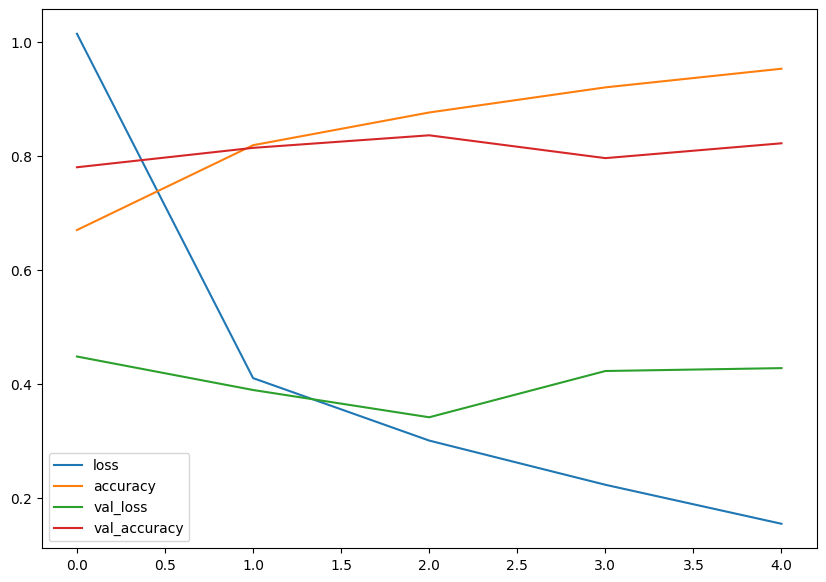

In [ ]:
# Lets plot the trainig curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize = (10,7))

In [ ]:
# Plot validation and training curves separately
def plot_loss_curves(history):
  """
  Return seprate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epoch

  # plot loss
  plt.plot(epochs , loss, label ="training_loss")
  plt.plot(epochs , val_loss, label ="testing_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs , accuracy, label ="training_accuracy")
  plt.plot(epochs , val_accuracy, label ="testing_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

🔑 **Note:**  when a model's **validation loss start to increase**, it is likely that the model is **overfitting** the trainig dataset. This means , it is learning the patterns in the training dataset too well and thus the model's ability to generalize to unseen data will be diminished

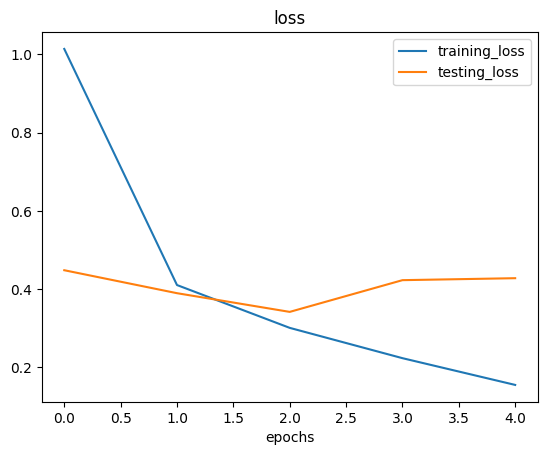

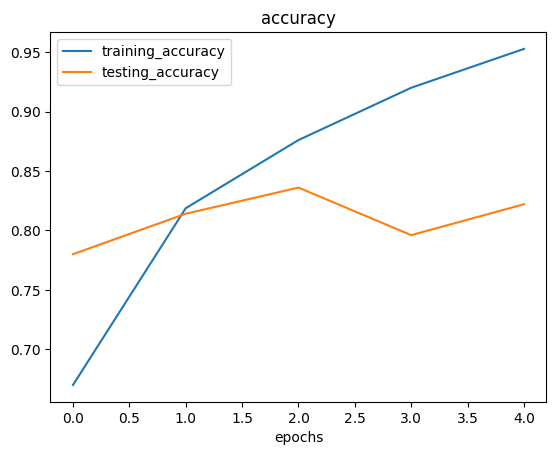

In [ ]:
# check out the loss and accuracy of model 4
plot_loss_curves(history_4)

🔑**Note:** Ideally the two loss curves (training and validation) will be very similar to each other
decreasing at similar rates), when there are large differences your model may be overfitting.

### 6.Adjust the model parameter

Fitting a machine learning model comes in 3 steps

0.  Create a baseline
1.  Beat the baseline by overfitting a larger model
2.  Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:

* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

> **Note:** Reducing overfiting is also know as **regularization**

In [ ]:
#  Create the model (this is going to be our new base line)

model_5 = Sequential([
    Conv2D(10,3,activation = "relu", input_shape = (224,224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")

])

In [ ]:
#  Compile the model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
history_5 = model_5.fit(train_data,
                       epochs =5,
                       steps_per_epoch = len(train_data),
                       validation_data = test_data,
                       validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 142ms/step - loss: 0.6176 - accuracy: 0.6547 - val_loss: 0.4552 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 6s 119ms/step - loss: 0.4461 - accuracy: 0.7987 - val_loss: 0.3677 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 6s 123ms/step - loss: 0.4429 - accuracy: 0.7940 - val_loss: 0.3675 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 6s 123ms/step - loss: 0.3911 - accuracy: 0.8320 - val_loss: 0.3404 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 5s 114ms/step - loss: 0.3663 - accuracy: 0.8407 - val_loss: 0.3164 - val_accuracy: 0.8660


In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

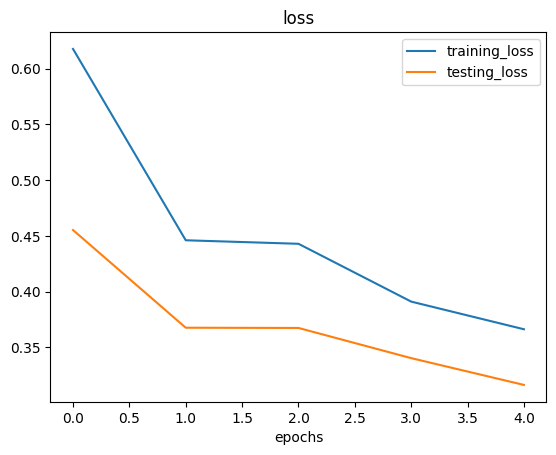

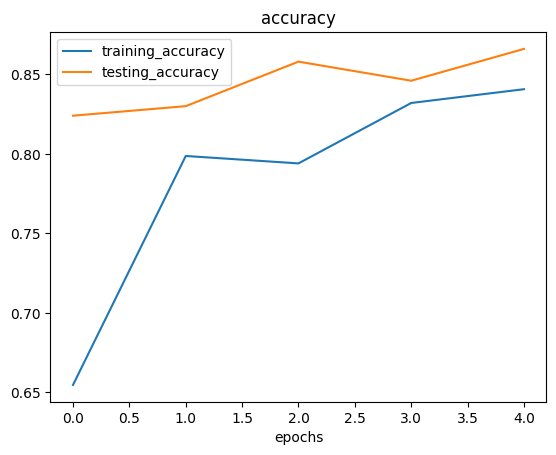

In [ ]:
#  Plot the loss curves
plot_loss_curves(history_5)

###  Opening our bags of tricks and finding data augmentation

In [ ]:
# create ImageDataGenerator training instant with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                           rotation_range = 0.2, # How much do you want to rotate an image?
                                           shear_range = 0.2, # How much do you want to shear an image?
                                           zoom_range = 0.2, # zoom in image randomly
                                           width_shift_range = 0.2, # move your image around on the x-axis
                                           height_shift_range = 0.3,# move your image around on the y-axis
                                           horizontal_flip = True) # How much do you want to flip an image?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale = 1/255.)

> **Question:** what is data augmentation?

**Data augmentation** is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjuting the rotation of an image, flipping it, cropping it or something similar

Lets write some code to visualize data augmentation

In [ ]:
IMG_SIZE = (224,224)
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size = IMG_SIZE,
                                                                  batch_size = 32,
                                                                  class_mode = "binary",
                                                                  shuffle = False) # for demestration purpose only
#  Create a non-augmented train data
print("Non-Augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = IMG_SIZE,
                                               batch_size = 32,
                                               class_mode = "binary",
                                               shuffle = False) # for demestration purpose only

#  Create a non-augmented test data
print("Non-Augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size = IMG_SIZE,
                                               batch_size = 32,
                                               class_mode = "binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented test data
Found 500 images belonging to 2 classes.


> **Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data  augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model

Finally... let's visualize some augmented data!!!

In [ ]:
#  Get sample data batches
images , labels = train_data.next()
augmented_images , augmented_labels = train_data_augmented.next() # note : labels are not augmented ..ony data (images)

showing image number : 18


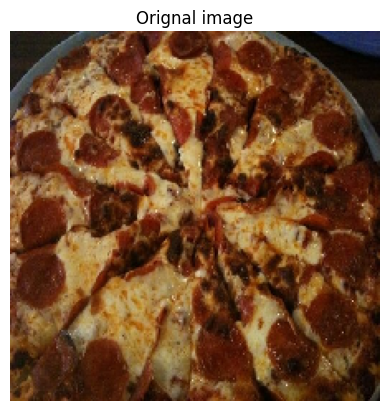

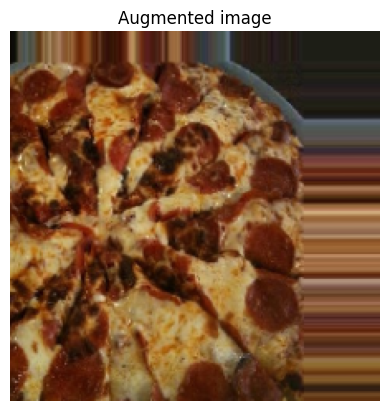

In [ ]:
#  Show the orignal image and augmented image
import random
random_number = random.randint(0, 32) # our batch size are 32
print(f"showing image number : {random_number}")
plt.imshow(images[random_number])
plt.title(f"Orignal image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Now we've seen what augmented training data looks like, let's
build a model and see how it learns on augmented data

In [ ]:
# Create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10,3,activation = "relu", input_shape = (224,224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

#  Compile the model
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fiting model_6 on augmented training data
                       epochs =5,
                       steps_per_epoch = len(train_data_augmented),
                       validation_data = test_data,
                       validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 434ms/step - loss: 0.7022 - accuracy: 0.4360 - val_loss: 0.6836 - val_accuracy: 0.6340
Epoch 2/5
47/47 [==============================] - 22s 476ms/step - loss: 0.6841 - accuracy: 0.5507 - val_loss: 0.6710 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 22s 472ms/step - loss: 0.6764 - accuracy: 0.5260 - val_loss: 0.6452 - val_accuracy: 0.6520
Epoch 4/5
47/47 [==============================] - 22s 464ms/step - loss: 0.6738 - accuracy: 0.5767 - val_loss: 0.6247 - val_accuracy: 0.7020
Epoch 5/5
47/47 [==============================] - 21s 442ms/step - loss: 0.6273 - accuracy: 0.6747 - val_loss: 0.5509 - val_accuracy: 0.7340


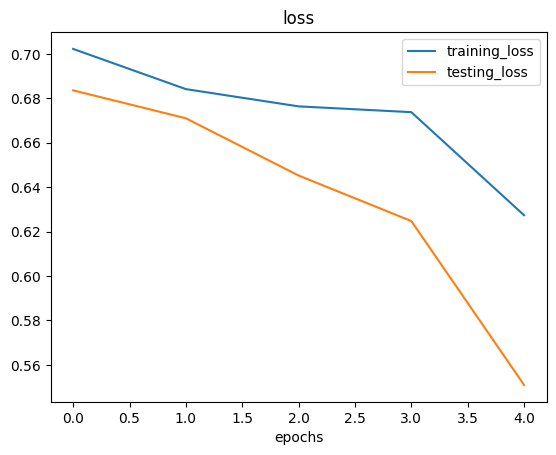

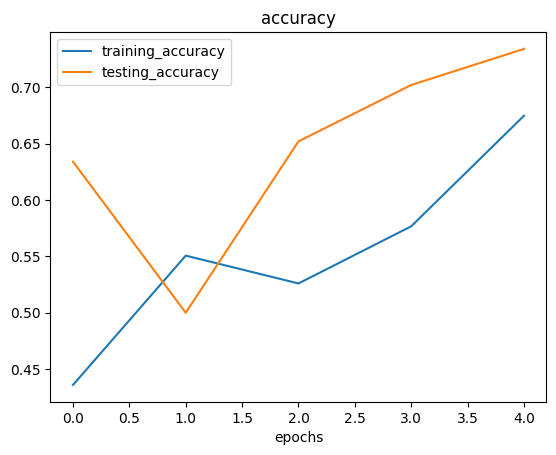

In [ ]:
#  Plot the loss curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another
model (the same as before) on it and see what happen

In [ ]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size = (224,224),
                                                                  batch_size = 32,
                                                                  class_mode = "binary",
                                                                  shuffle = True)

Found 1500 images belonging to 2 classes.


In [ ]:
# Create a model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10,3,activation = "relu", input_shape = (224,224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

#  Compile the model
model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # fiting model_7 on augmented shuffled training data
                       epochs =5,
                       steps_per_epoch = len(train_data_augmented_shuffled),
                       validation_data = test_data,
                       validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 433ms/step - loss: 0.6801 - accuracy: 0.5687 - val_loss: 0.6144 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 22s 455ms/step - loss: 0.6241 - accuracy: 0.6793 - val_loss: 0.5798 - val_accuracy: 0.6820
Epoch 3/5
47/47 [==============================] - 22s 461ms/step - loss: 0.5577 - accuracy: 0.7293 - val_loss: 0.4241 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 21s 443ms/step - loss: 0.5398 - accuracy: 0.7320 - val_loss: 0.4870 - val_accuracy: 0.7900
Epoch 5/5
47/47 [==============================] - 22s 464ms/step - loss: 0.5332 - accuracy: 0.7387 - val_loss: 0.3999 - val_accuracy: 0.8400


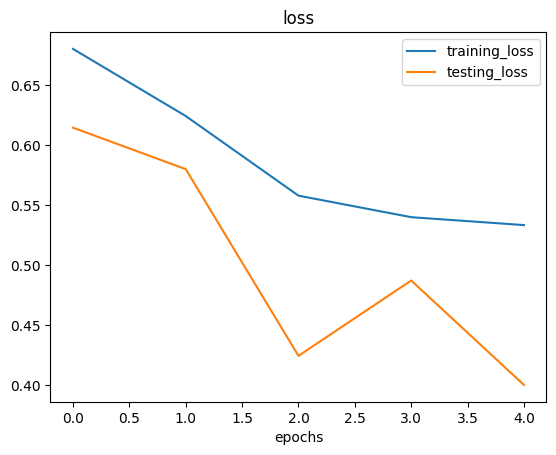

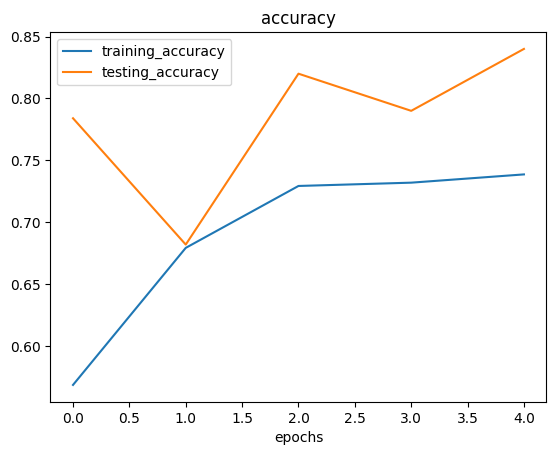

In [ ]:
#  Plot the loss curves
plot_loss_curves(history_7)

**Note**: When shuffing training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time so it is required to shuffle the data Instead of just pizza then steak).

### 7. Repeat untill satisfied
Since we've already beaten our baseline, there are a few things we could try to contine to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D`/
`MaxPool2D` layers)
* Increase the number of filters in each convolutional layer
(e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

> **Practice:** Recreate the model on the CNN explainer website (same as “model 1°) and see how it performs on the augmented shuffled trainig data

### Make a prediction with our trained model on our own custom data

In [ ]:
# classes we are working with
print(class_names)

['pizza' 'steak']


--2024-02-19 04:50:54--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2024-02-19 04:50:54 (189 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



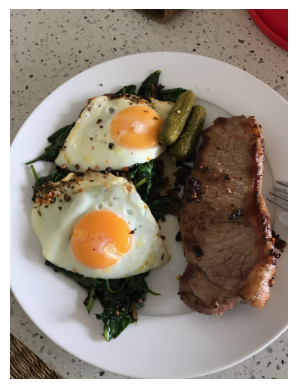

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# check the shape of image
steak.shape

(4032, 3024, 3)

> **Note:** When you a train a neural network and you want to make a prediction with it on your own custom data, it's important than your custom data (or new data) is preprocessed into the same format as the data your model is trained on

In [ ]:
# Create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename , img_shape =224):
    """
    Reads an inage fron filename, turns it into a tensor and reshapes it
    to (img_shape, img_shape, colour_channels).
    """
    # Read in the image
    img = tf.io.read_file(filename)

    # Decode the read file into a tensor
    img = tf.image.decode_image(img)

    # Resize the image
    img = tf.image.resize(img, size = [img_shape, img_shape])

    # Rescale the image (get all values between 0 and 1)
    img = img/255.
    return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis= 0))
pred

1/1 [==============================] - 0s 239ms/step


array([[0.90489036]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as model prediction

In [ ]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the prediction probability and and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model ,filename , class_names = class_names ):
    """
    Imports an image located at filename, makes a prediction with model
    and plots the image with the predicted class as the title
    """

    # import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make prediction
    pred = model.predict(tf.expand_dims(img, axis= 0))

    # get the preicted class
    pred_class = class_names[int(tf.round(pred))]

    # plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);


1/1 [==============================] - 0s 19ms/step


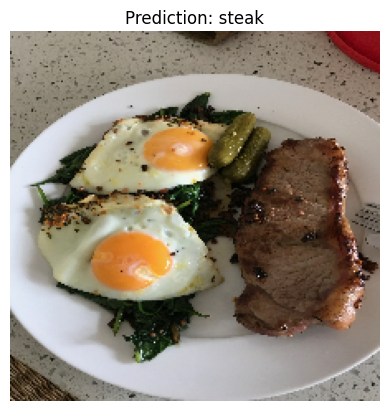

In [ ]:
# Test our model on a custom image
pred_and_plot (model_7, "03-steak.jpeg")

Our model works! Let's try it on another image... this time
pizza

--2024-02-19 04:50:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.02s   

2024-02-19 04:50:58 (180 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 20ms/step


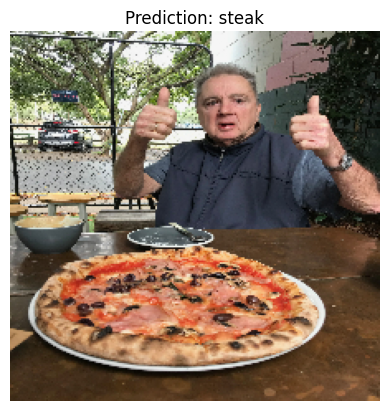

In [ ]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7,"03-pizza-dad.jpeg" )

## Multiclass Image classcification

We just been through a bunch of the following steps with binary classcification problem (pizza vs stake), now we are going to steps things a notch with 10 classes of food (multi-class classcification)

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline )
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameter and improve the model (try to beat baseline / reduce overfitting )
7. Repeat untill satisfied

### 1. Import and become one with data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2024-02-19 04:50:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.207, 142.251.12.207, 172.217.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  23.0MB/s    in 23s     

2024-02-19 04:51:22 (21.6 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walk trough 10 classes of food image data
for dirpath , dirname , filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirname)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/test
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream
There are 10 directories and 0 images in 10_fo

In [ ]:
!ls -ls 10_food_classes_all_data/

total 8
4 drwxr-xr-x 12 root root 4096 Feb 19 04:41 test
4 drwxr-xr-x 12 root root 4096 Feb 19 04:41 train


In [ ]:
# Stepup the train and test directories

train_dir =  "10_food_classes_all_data/train/"
test_dir =  "10_food_classes_all_data/test/"

In [ ]:
#  Lets get the class names
import numpy as np
import pathlib
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted ([item.name for item in data_dir.glob("*")]))
print (class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape (512, 512, 3)


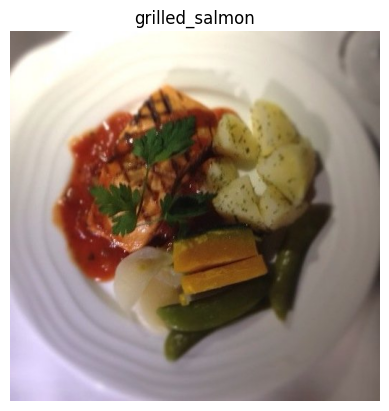

In [ ]:
#  Visualize ,  Visualize ,Visualize
import random
img = view_random_image(target_dir = train_dir ,
                       target_class = random.choice (class_names) )

### 2. Preprocess the data (prepare it for a model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the dataset
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

# Load data in from directories and turn into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224 , 224),
                                               batch_size = 32,
                                               class_mode ="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size = (224 , 224),
                                               batch_size = 32,
                                               class_mode ="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (strat wih the base line)

We have been talking a lot about the CNN explainer website ...
how about we just take their model (also on 10 classes ) use it for our problem

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D ,  MaxPool2D ,Flatten ,  Dense, Activation

# Create our  model (very similar to previous models but actually the samea as CNN explainer website)
model_8 = Sequential([
    Conv2D(10,3,input_shape = (224, 224,3)),
    Activation (activation = tf.keras.activations.relu),
    Conv2D(10,3,activation = tf.keras.activations.relu),
    MaxPool2D(),
    Conv2D(10,3,activation = tf.keras.activations.relu),
    Conv2D(10,3,activation = tf.keras.activations.relu),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = tf.keras.activations.softmax) # changed to have 10 output neuron and use the softmax activation functop
])

# Compile the model
model_8.compile (loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

### 4. Fit the model

In [ ]:
# Fit tha model
history_8 = model_8.fit(train_data, # now 10 different classes
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data =test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 37s 150ms/step - loss: 2.1765 - accuracy: 0.1965 - val_loss: 2.0582 - val_accuracy: 0.2600
Epoch 2/5
235/235 [==============================] - 30s 128ms/step - loss: 1.8658 - accuracy: 0.3648 - val_loss: 1.8667 - val_accuracy: 0.3560
Epoch 3/5
235/235 [==============================] - 31s 133ms/step - loss: 1.4211 - accuracy: 0.5255 - val_loss: 2.0067 - val_accuracy: 0.3380
Epoch 4/5
235/235 [==============================] - 29s 124ms/step - loss: 0.8585 - accuracy: 0.7189 - val_loss: 2.5930 - val_accuracy: 0.2984
Epoch 5/5
235/235 [==============================] - 32s 137ms/step - loss: 0.3636 - accuracy: 0.8877 - val_loss: 3.6498 - val_accuracy: 0.2812


### 5. Evaluate the model

In [ ]:
#  Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 7s 92ms/step - loss: 3.6498 - accuracy: 0.2812


[3.6498446464538574, 0.28119999170303345]

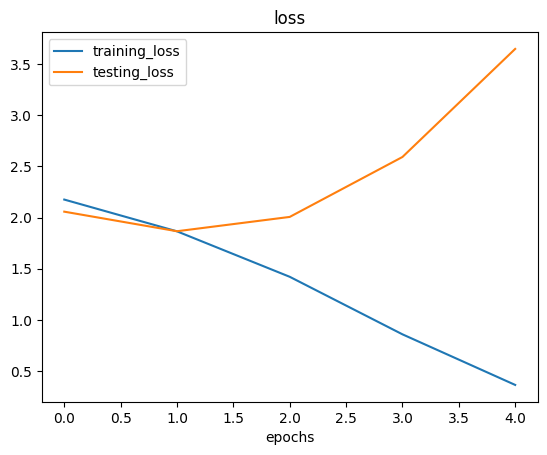

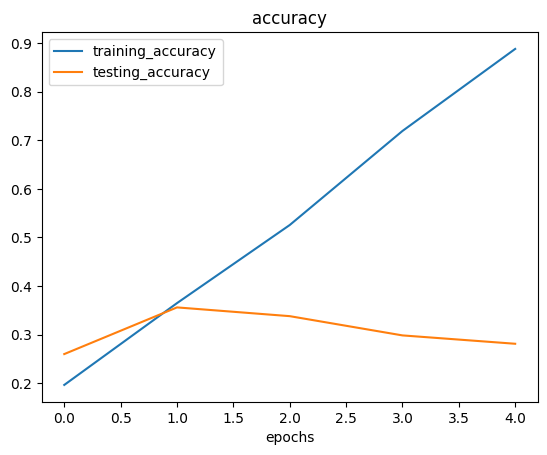

In [ ]:
#  Check out the model loss curves
plot_loss_curves(history_8)

What do these loss curves tell us?

Well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training daa but fails to generalize well to unseen data and performs poorly on the test dataset

### 6. Adjust the model hyperparameters (to beat the baseline / reduce overfitting)


Due to its performance on the training data ots clear our model is learning something ...
However its not generalizing well to unseen data (overfitting).

So, lets try and fix overfitting by ...

* **Get more data** - having more data givess a model more opportunity to learn patterns...
* **Simplify the model** - if our current model is overfitting the data it may be too complicated of a model , one way to simplify a model is to: reduce number of layers or reduce the number of hidden units in layers
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without alterning the orignal data)
* **Use Transfer learning**  - trasfer learning leverages the patterns another model has learned on similar data to use those patterns on your own dataset

In [ ]:
# how about we try and simplify the model first?
# Lets try to remove 2 Convolutional layers
model_9 = Sequential([
    Conv2D(10,3,activation = tf.keras.activations.relu ,input_shape= (224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation = tf.keras.activations.relu),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = tf.keras.activations.softmax)
])

model_9.compile (loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

In [ ]:
model_9.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 flatten_14 (Flatten)        (None, 29160)             0         
                                                                 
 dense_20 (Dense)            (None, 10)              

In [ ]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [ ]:
# Fit the model with 2x conv layers removed
hostory_9 = model_9.fit (train_data,
             epochs =5,
             steps_per_epoch = len(train_data),
             validation_data = test_data,
             validation_steps = len(test_data)
)

Epoch 1/5
235/235 [==============================] - 31s 126ms/step - loss: 2.1424 - accuracy: 0.2341 - val_loss: 2.0275 - val_accuracy: 0.2728
Epoch 2/5
235/235 [==============================] - 45s 192ms/step - loss: 1.7939 - accuracy: 0.3901 - val_loss: 1.9258 - val_accuracy: 0.3316
Epoch 3/5
235/235 [==============================] - 32s 137ms/step - loss: 1.3521 - accuracy: 0.5536 - val_loss: 2.0918 - val_accuracy: 0.3100
Epoch 4/5
235/235 [==============================] - 28s 121ms/step - loss: 0.8369 - accuracy: 0.7389 - val_loss: 2.4057 - val_accuracy: 0.3080
Epoch 5/5
235/235 [==============================] - 30s 127ms/step - loss: 0.4206 - accuracy: 0.8835 - val_loss: 3.0399 - val_accuracy: 0.2712


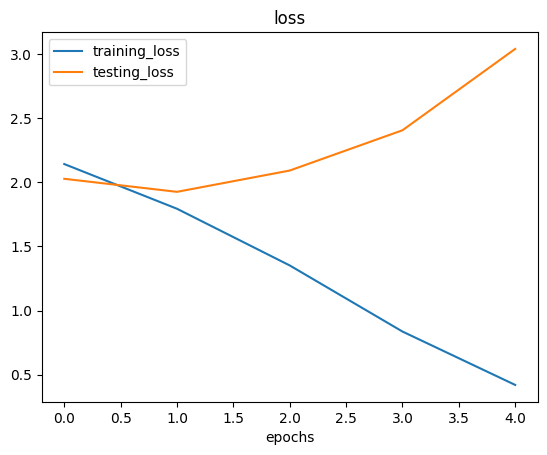

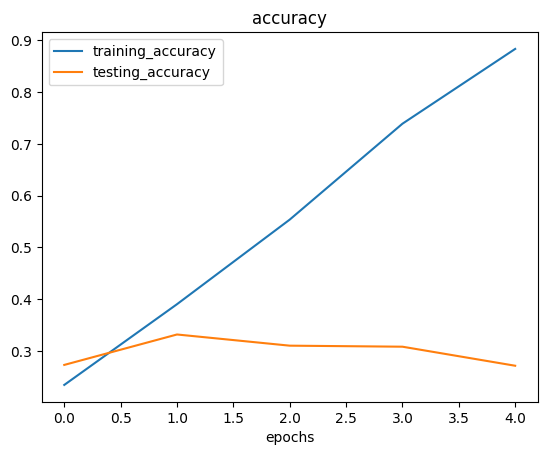

In [ ]:
#  Check out the loss curves
plot_loss_curves(hostory_9)

Looks like our "simplifying the model" experiment didn't work..the accuracy went down and overfitting continued...

How about we try data augmentation??

### Trying to reduce overfitting with data augmentation

Lets try and improve our models results by using augmentation data ..

Idealy we want to:
* Reduce overfitting (get the train and validation closer)
* Improve validation accuracy

In [ ]:
#  Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator( rescale = 1/255.,
                                              rotation_range = 0.2,
                                              width_shift_range = 0.2,
                                              height_shift_range =  0.2,
                                              zoom_range =0.2,
                                              horizontal_flip = True )

train_data_augmented = train_datagen_augmented.flow_from_directory (train_dir,
                                                                       target_size = (224,224),
                                                                       batch_size = 32,
                                                                       class_mode = "categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
# Lets create another model this time we will fit it on augmented train data of 10 classes
model_10 = tf.keras.models.clone_model(model_8)

#  Compile the cloned model (using the same setup as previous model)
model_10.compile (loss = tf.keras.losses.CategoricalCrossentropy(),
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics = ["accuracy"])

In [ ]:
history_10 = model_10.fit(train_data_augmented,
                          epochs = 5,
                          steps_per_epoch = len(train_data_augmented),
                          validation_data = test_data,
                          validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 121s 506ms/step - loss: 2.2201 - accuracy: 0.1772 - val_loss: 2.0107 - val_accuracy: 0.2880
Epoch 2/5
235/235 [==============================] - 123s 521ms/step - loss: 2.0883 - accuracy: 0.2496 - val_loss: 1.9563 - val_accuracy: 0.3072
Epoch 3/5
235/235 [==============================] - 145s 617ms/step - loss: 2.0205 - accuracy: 0.2899 - val_loss: 1.9292 - val_accuracy: 0.3124
Epoch 4/5
235/235 [==============================] - 155s 659ms/step - loss: 1.9608 - accuracy: 0.3200 - val_loss: 1.8290 - val_accuracy: 0.3760
Epoch 5/5
235/235 [==============================] - 137s 582ms/step - loss: 1.9469 - accuracy: 0.3229 - val_loss: 1.8625 - val_accuracy: 0.3608


In [ ]:
model_8.evaluate (test_data)

79/79 [==============================] - 7s 84ms/step - loss: 3.6498 - accuracy: 0.2812


[3.6498448848724365, 0.28119999170303345]

In [ ]:
model_10.evaluate (test_data)

79/79 [==============================] - 7s 83ms/step - loss: 1.8625 - accuracy: 0.3608


[1.862522840499878, 0.36079999804496765]

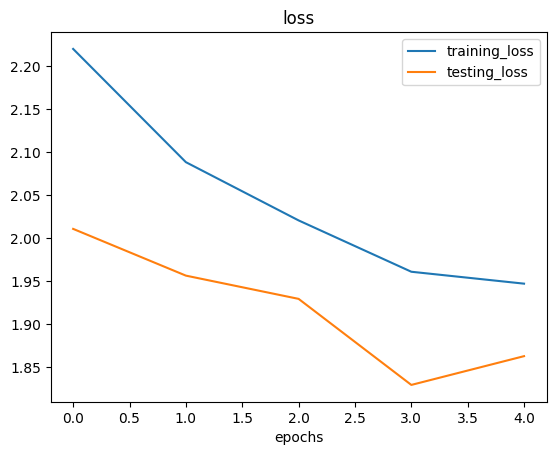

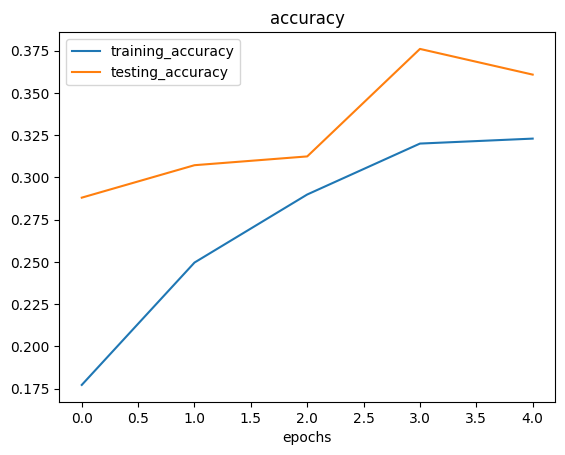

In [ ]:
#  Check out our trained on augmented data's  the loss curves
plot_loss_curves(history_10)

Woah! That looks much butter , the loss curves are much closer to each other that the baseline model and they look like they are heading in the right direction (certainly not the wrong direction ) so if we were to train for longer , we might see the futher improvement

### 7. Repeat until satisfied

We could keep going here... continally trying to bring our loss curves closer together and trying to improve the validation / test accuracy

How?

By running a lots of experiments, namely:

- restucturing our model's atcitecture (increasing layers / hidden units )
- adjust the learning rate
- try different methods of data augmentation (adjust the huperparameters in our ImageDataGenerator instance)
- training for longer (e.g. 10 epochs instead of 5 epochs)
- try **transfer learning**

### Making a prediction with our trained model

Let's use our trained model to make some predictions on our own custom images!

In [ ]:
# Remind ourselves of the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflov-deep-learning/main/inages/03-steak.jpeg

--2024-02-19 05:56:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2024-02-19 05:56:26 (226 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

--2024-02-19 05:56:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, await

In [ ]:
#  Reconfig pred_and_plot function to work with multiclass image
def pred_and_plot(model ,filename , class_names = class_names ):
    """
    Imports an image located at filename, makes a prediction with model
    and plots the image with the predicted class as the title
    """

    # import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make prediction
    pred = model.predict(tf.expand_dims(img, axis= 0))

    # Add in logic for multi clas
    if len(pred[0])>1:
      pred_class = class_names [tf.argmax(pred[0])]
    else:
      pred_class = class_names[int(tf.round(pred))]

    # plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

1/1 [==============================] - 0s 18ms/step


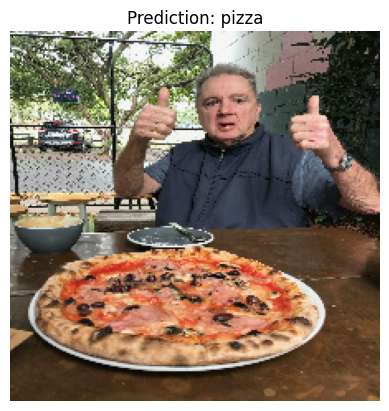

In [ ]:
# Make a prediction using model_10
pred_and_plot(model = model_10,
              filename = "03-pizza-dad.jpeg",
              class_names = class_names)

1/1 [==============================] - 0s 68ms/step


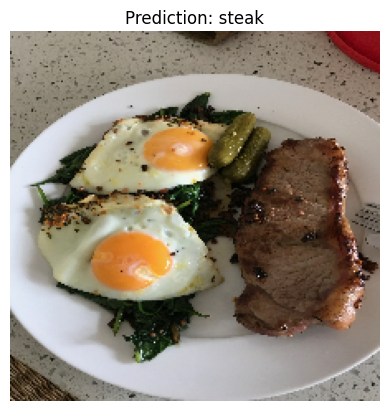

In [ ]:
# Make a prediction using model_10
pred_and_plot(model = model_10,
              filename = "03-steak.jpeg",
              class_names = class_names)

1/1 [==============================] - 0s 28ms/step


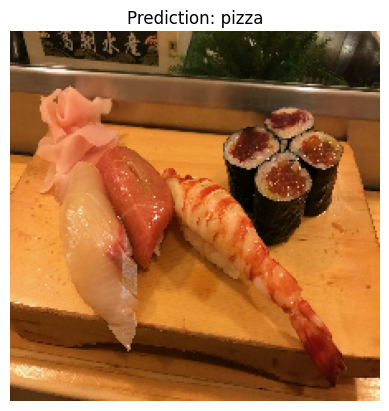

In [ ]:
# Make a prediction using model_10
pred_and_plot(model = model_10,
              filename = "03-sushi.jpeg",
              class_names = class_names)

1/1 [==============================] - 0s 19ms/step


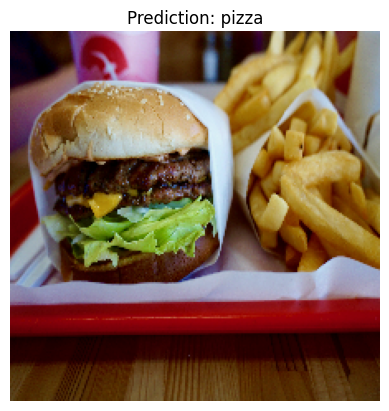

In [ ]:
# Make a prediction using model_10
pred_and_plot(model = model_10,
              filename = "03-hamburger.jpeg",
              class_names = class_names)

Looks like our model didn't perform very well on our custom images but this because it only achieved ~39% accuracy on the test data. So we can expect it to function quite poorly on  other unseen data.

1/1 [==============================] - 0s 18ms/step


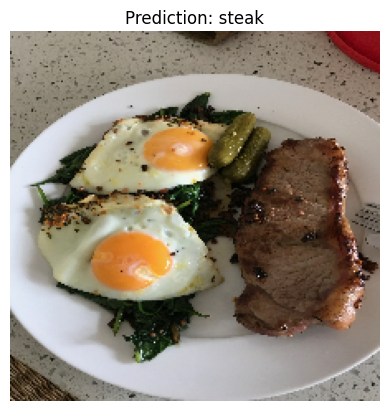

In [ ]:
# Good news: our updated pred and plot function works for binary classification too...
pred_and_plot(model = model_3,  # trained on pizza vs steak
              filename = "03-steak.jpeg",
              class_names = ["pizza", "steak"])

## Saving and loading our model


In [ ]:
# save a model
model_10.save("saved_trained model_10")

In [ ]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model ("saved_trained model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 8s 94ms/step - loss: 1.8625 - accuracy: 0.3608


[1.862522840499878, 0.36079999804496765]

In [ ]:
# Compare our loaded model to our existing model
model_10.evaluate(test_data)

79/79 [==============================] - 8s 96ms/step - loss: 1.8625 - accuracy: 0.3608


[1.8625224828720093, 0.36079999804496765]